In [1]:
import pandas
pandas.__version__

'1.5.3'

In [2]:
# Just as we generally import NumPy under the alias np,we will import pandas under the alias pd:
import pandas as pd

## Introducing Pandas Objects

In [3]:
# we will start our code session with the standard NumPy and Pandas imports:
import numpy as np
import pandas as pd

### The pandas series object

In [4]:
# A pandas series is a one-dimensional array of indexed data. It can be created from a list or array:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [5]:
'''As we see in the preceding output, the Series wraps both a sequence of values and a
sequence of indices, which we can access with the values and index attributes. The
values are simply a familiar NumPy array:'''
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [6]:
# The index is an array-like object of type pd.Index, which we'll discuss ni more detail momentarily:
data.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
#Like with a NumPy array, data can be accessed by the associated index via the familiar python square-bracket notation:
data[1]

0.5

In [8]:
data[1:3]

1    0.50
2    0.75
dtype: float64

#### Series as generalized NumPy array
From what we’ve seen so far, it may look like the Series object is basically interchangeable with a one-dimensional NumPy array. The essential difference is the presence of the index: while the NumPy array has an implicitly defined integer index usedto access the values, the Pandas Series has an explicitly defined index associated with the values.This explicit index definition gives the Series object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type. 

In [9]:
# for example, if we wish, we can use strings as an index:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b','c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [10]:
# And the items works as expected
data['b']

0.5

In [11]:
# we can even use noncontiguous or nonsequential indices:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                index = [2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

#### Series as specialized dictionary
In this way, you can think of a Pandas Series a bit like a specialization of a Python dictionary. A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a Series is a structure that maps typed keys to a set of typed values. This
typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas Series makes it much more efficient than Python dictionaries for certain operations.

In [12]:
# we can make the Series-as-dictionary analog even more clear by constructing a Series object directly from a python dictionary:
population_dict = {'California' : 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 195528260,
                   'Illinois': 12882135 }
population = pd.Series(population_dict)
population

California     38332521
Texas          26448193
New York       19651127
Florida       195528260
Illinois       12882135
dtype: int64

In [13]:
# from here, typical dictionary-style item access can be performed:
population['California']

38332521

In [14]:
# Unlike a dictionary, though, the Series also supports array-style operations such as slicing:
population['California':'Illinois']

California     38332521
Texas          26448193
New York       19651127
Florida       195528260
Illinois       12882135
dtype: int64

#### Constructing Series objects

In [15]:
# we have already seen a few ways of constructing a Pandas Series from scratch; all of them are some version of the following:
#pd.Series(data, index=index)
#where index is an optional argument, and data can be one of many entities.

In [16]:
# for example, data can be a list or NumPy array, in which case index defaults to an integer sequence:
pd.Series([2, 4, 6])
#data can be a scalar, which is repeated to fill the specified index:

0    2
1    4
2    6
dtype: int64

In [17]:
#data can be a dictionary, in which index defaults to the sorted dictionary keys:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In [18]:
# In each case, the index can be explicitly set if a different result is preferred:
pd.Series({2:'a', 1:'b', 3:'c'}, index = [3, 2])

3    c
2    a
dtype: object

### The Pandas DataFrame Object
The next fundamental structure in Pandas is the DataFrame. Like the series object, the DataFrame can be thought of either as a generalization of a NumPy array, or as a specialization of a python dictionary. We'll now take a look at each of these perspectives/

#### DataFrame as a generalizedd NumPy array
If a Series is an analog of a one-dimensional array with flexible indices, a DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names. Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a DataFrame as a
sequence of aligned Series objects. Here, by “aligned” we mean that they share the same index.

In [19]:
# to demonstrate this, lets first construct a new series listing the area of each of the five states
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
 'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [20]:
# Now that we have this along with the popualation Series from before, we can use a dictionary to construct a single two-dimnensional object containning this information:
states = pd.DataFrame({'population' : population,
                      'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,195528260,170312
Illinois,12882135,149995


In [21]:
# like the Series object, the DataFrame has an index attribute that give access to the index labels:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [22]:
# Additionally, the DataFrame has a columns attributes, which is an Index object holding the column labels:
states.columns

Index(['population', 'area'], dtype='object')

#### DataFrame as specialized dictionary
Similarly, we can also think of a DataFrame as a specialization of a dictionary. Where
a dictionary maps a key to a value, a DataFrame maps a column name to a Series of
column data.

In [23]:
# for example, asking for the 'area' attribure returns the Series object containing the areas we saw earlier:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

#### constructing DataFrame objects
A Pandas DataFrame can be constructed in a variety of ways. Here we'll give several examples.


#### From a single Series object
A DataFrame is a collection of Series objects, and a single column DataFrame can be constructed from a single Series:

In [24]:
pd.DataFrame(population, columns = ['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,195528260
Illinois,12882135


####  From a list of dicts.
Any list of dictionaries can be made into a DataFrame. We'll use a simple list comprehension to create some data:

In [25]:
data = [{'a':i, 'b':2*i}
       for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [26]:
# Even if some keys in the dictionary are missing, Pandas will fill them in with NaN(i.e., 'not a number') values:
pd.DataFrame([{'a':1, 'b':2}, {'b':3,'c':4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


#### From a two-dimensional NumPy array.
Given a two-dimensional array of data, we can create a DataFrame with any specified column and index names. If omitted, an integer index will be used for each:

In [27]:
pd.DataFrame(np.random.rand(3, 2),
            columns = ['foo', 'bar'],
            index = ['a', 'b', 'c'])

,foo,bar
a,0.884992,0.258772
b,0.730292,0.772289
c,0.848625,0.863375


#### From a NumPy structured array
A Pandas DataFrame operates much like a structured array, and can be created directly from one:

In [28]:
A = np.zeros(3, dtype =[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [29]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


#### The Pandas Index Object
We have seen here that both the Series and DataFrame objects contain an explicit index that lets you reference and modify data. This Index object is an interesting structure in itself, and it can be thought of either as an immutable array or as an ordered set (technically a multiset, as Index objects may contain repeated values). Those views have some interesting consequences in the operations available on Index objects.

In [30]:
# As a simpple, lets construct an Index from a list of integers:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

##### Index as immutable array

In [31]:
#The index object in many ways operates like an array. For example, we can use standard Python indexing notation to retrieve values or slices:
ind[1]

3

In [32]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [33]:
# Index objects also have many of the attributes familiar from NumPY arrays:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [34]:
# one difference between Index objects and NumPy arrays is that indices are immutable- that is, they cannot be modified via the normal means:
#ind[1] =  0

#### Index as ordered set
Pandas objects are designed to facilitate operations such as joins across datasets, which depend on many aspects of set arithmetic. The Index object follows many of the conventions used by Python’s built-in set data structure, so that unions, intersections, differences, and other combinations can be computed in a familiar way:

In [35]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [36]:
indA & indB # intersection

C:\Users\yugal\AppData\Local\Temp\ipykernel_12784\3149530883.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  indA & indB # intersection


Int64Index([3, 5, 7], dtype='int64')

In [37]:
indA | indB # union

C:\Users\yugal\AppData\Local\Temp\ipykernel_12784\4042773156.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  indA | indB # union


Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [38]:
indA ^ indB # symmetric difference

C:\Users\yugal\AppData\Local\Temp\ipykernel_12784\1357503912.py:1: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead.
  indA ^ indB # symmetric difference


Int64Index([1, 2, 9, 11], dtype='int64')

### Data Indexing and Selection
we’ll look at similar means of
accessing and modifying values in Pandas Series and DataFrame objects. If you have
used the NumPy patterns, the corresponding patterns in Pandas will feel very famil‐
iar, though there are a few quirks to be aware of.
We’ll start with the simple case of the one-dimensional Series object, and then move
on to the more complicated two-dimensional DataFrame object.

#### Data Selecton in Series
a Series object acts in many ways like a onedimensional NumPy array, and in many ways like a standard Python dictionary. If we
keep these two overlapping analogies in mind, it will help us to understand the pat‐
terns of data indexing and selection in these arrays.

##### Series as dictionary
Like a dictionary, the series object provides a mapping from a collection of keys to a collection of values:


In [39]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0], 
                index =['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [40]:
data['b']

0.5

In [41]:
# we can also use dictionary-like python expressions and methods to examine the keys/indices and values:
'a' in data

True

In [42]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [43]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [44]:
'''Series Objects can even be modified with a dictionary-like Syntax. Just as you can extend a dictionary by assigning to 
a new key, you can extend a Series by assigning to a new index values:'''
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

#### series as one-dimensonal array
A Series builds on this dictionary-like interface and provides array-style item selection via the same basic mechanisms as NumPy arrays—that is, slices, masking, and fancy indexing. 

In [45]:
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [46]:
# slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [47]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [48]:
#fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

#### Indexers: loc,iloc, and ix
These slicing and indexing conventions can be a source of confusion. For example, if your Series has an explicit integer index, an indexing operation such as data[1] will use the explicit indices, while a slicing operation like data[1:3] will use the implicit
Python-style index.

In [49]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3 , 5])
data

1    a
3    b
5    c
dtype: object

In [50]:
# explicit index when indexing
data[1]

'a'

In [51]:
# implicit index when indexing
data[1:3]

3    b
5    c
dtype: object

In [52]:
# first, the loc attribute allows indexing and slicing that always references the explicit index:
data.loc[1]

'a'

In [53]:
data.loc[1:3]

1    a
3    b
dtype: object

In [54]:
# The iloc attributes allows indexing and slicing that always reference the implicit python-style index:
data.iloc[1]

'b'

In [55]:
data.iloc[1:3]

3    b
5    c
dtype: object

#### Data selection in DataFrame
Recall that a DataFrame acts in many ways like a two-dimensional or structured array,
and in other ways like a dictionary of Series structures sharing the same index.
These analogies can be helpful to keep in mind as we explore data selection within
this structure.

#### DataFrame as dictionary
The first analogy we will consider is the DataFrame as a dictionary of related Series objects.Lets return to our example of areas and populations of states:

In [56]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                  'New York': 19651127, 'Florida': 19552860,
                  'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [57]:
# The individual Series that make up the columns of the DataFrame can be accessed via dictionary-style indexing of the column name:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [58]:
# Equivalently, we can use atribute-style access with column names that are strings:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [59]:
# The attribute-style column access actually accesses the exact same object as the dictionary-style access:
data.area is data['area']

True

Though this is a useful shorthand, keep in mind that it does not work for all cases!
For example, if the column names are not strings, or if the column names conflict
with methods of the DataFrame, this attribute-style access is not possible. For example, the DataFrame has a pop() method, so data.pop will point to this rather than the
"pop" column:

In [60]:
data.pop is data['pop']

False

In particular, you should avoid the temptation to try column assignment via attribute(i.e., use data['pop'] = z rather than data.pop = z).
<br>
Like with the Series objects discussed earlier, this dictionary-style syntax can also be
used to modify the object, in this case to add a new column:

In [61]:
data['density'] = data['pop']/ data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


#### DataFrame as two-dimensional array

In [62]:
# we can examine the raw underlying data array using the values attribute:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [63]:
# For example, we can transpose the full DataFrame to swap rows and columns:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [64]:
# In particular, passing a single index to an array accesses a row:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [65]:
# and passing a single 'index' to a DataFrame accesses a column:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [66]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [67]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [68]:
# The ix indexer allows a hybrid of these two approaches:
#data.ix[:3, :'pop']

In [69]:
# For example, in the loc indexer we can combining masking and fancy indexing as:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [70]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


#### Additional indexing conventions
There are a couple extra indexing conventions that might seem at odds with the preceding discussion, but nevertheless can be very useful in practice.

In [71]:
# FIrst, while indexing refers to columns, slicing refers to rows:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [72]:
# such slides can aslo refer to rows by number rather than by index:
data[1:3]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


In [73]:
# similarly, direct making operations are also interpreted row-wise rather than column-wise:
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


### Operations on Data in Pandas
Pandas includes a couple useful twists, however: for unary operations like negation and trigonometric functions, these ufuncs will preserve index and column labels in the output, and for binary operations such as addition and multiplication, Pandas will automatically align indices when passing the objects to the ufunc. This means that keeping the context of data and combining data from different source both potentially error-prone tasks with raw NumPy arrays become essentially foolproof ones with Pandas. We will additionally see that there are well-defined operations between one-dimensional Series structures and two-dimensional DataFrame structures.

#### Ufuncs: Index Preservation
Because Pandas is designed to work with NumPy, any NumPy ufuncs will work on pandas series and DataFrame objects. Let's start by defining a simple series and DataFrame on which to demonstrate this:

In [74]:
import pandas as pd
import numpy as np

In [75]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [76]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                 columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [77]:
# If we apply a NumPy ufuncs on either of these objects, the result will be another Pandas object with the indices preserved:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [78]:
# Or, for a slightly more complex calculation:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


#### UFuncs: Index Alignment
For binary operations on two Series or DataFrame objects, Pandas will align indices
in the process of performing the operation. This is very convenient when you are
working with incomplete data, as we’ll see in some of the examples that follow.

##### Index alignment in Series
As an example, suppose we are combining two different data sources, and find only the top three US states by area and the top three US states by population:

In [79]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name = 'area')
population = pd.Series({'California': 38332521, 'Texas': 26446193,
                       'New York': 19651127}, name = 'population')


In [80]:
# Let's see what happens when we divide these to compute the population density:
population / area
# The resulting array contains the union of indices of the two input arrays, which we could determine using standard python set arithmetic on these indices:

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.015865
dtype: float64

In [81]:
area.index | population.index

C:\Users\yugal\AppData\Local\Temp\ipykernel_12784\3572280633.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  area.index | population.index


Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [82]:
# This index matching is implemented this way for any Python's built in airthmetics expressions; any missing values are filled in with NaN by default:
A = pd.Series([2, 4, 6], index = [0, 1, 2])
B = pd.Series([1, 3, 5], index=[1,2,3])
A + B


0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

If using NaN values is not the desired behavior, we can modify the fill value using
appropriate object methods in place of the operators. For example, calling A.add(B)
is equivalent to calling A + B, but allows optional explicit specification of the fill value
for any elements in A or B that might be missing:

In [83]:
A.add(B, fill_value = 0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

##### Index alignment in a DataFrame
A similar type of alignment takes place for both columns and indices when you are
performing operations on DataFrames:

In [84]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns = list('AB'))
A

,A,B
0,1,11
1,5,1


In [85]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns = list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [86]:
A + B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


Notice that indices are aligned correctly irrespective of their order in the two objects,
and indices in the result are sorted. As was the case with Series, we can use the asso‐
ciated object’s arithmetic method and pass any desired fill_value to be used in place
of missing entries. Here we’ll fill with the mean of all values in A (which we compute
by first stacking the rows of A):

In [87]:
fill = A.stack().mean()
A.add(B, fill_value = fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


#### Ufuncs: Operations Between DataFrame and Series
When you are performing operations between a DataFrame and a Series, the index
and column alignment is similarly maintained. Operations between a DataFrame and
a Series are similar to operations between a two-dimensional and one-dimensional
NumPy array.

In [88]:
# consider one common operation, where we find the difference of a two-dimensional array and one of its rows:
A = rng.randint(10, size = (3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [89]:
A - A[0]
# According to NumPy's broadcasting rules, subtraction betweeen a two-dimensional array and one of its rows is applied row-wise.

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [90]:
# In Pandas , the convention similarly operates row-wise by default:
df = pd.DataFrame(A, columns = list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [91]:
# If you would instead like to operate column-wise, you can use the object methods mentioned earlier, while specifying the axis keyword:
df.subtract(df['R'], axis = 0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [92]:
halfrow = df.iloc[0, ::2]
halfrow

Q    3
S    2
Name: 0, dtype: int32

In [93]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


### Handling Missing Data
The difference between data found in many tutorials and data in the real world is that
real-world data is rarely clean and homogeneous. In particular, many interesting
datasets will have some amount of data missing. To make matters even more compli‐
cated, different data sources may indicate missing data in different ways.
In this section, we will discuss some general considerations for missing data, discuss
how Pandas chooses to represent it, and demonstrate some built-in Pandas tools for
handling missing data in Python. Here and throughout the book, we’ll refer to miss‐
ing data in general as null, NaN, or NA values.
### Trade-Offs in Missing Data Conventions
A number of schemes have been developed to indicate the presence of missing data in
a table or DataFrame. Generally, they revolve around one of two strategies: using a
mask that globally indicates missing values, or choosing a sentinel value that indicates
a missing entry.
In the masking approach, the mask might be an entirely separate Boolean array, or it
may involve appropriation of one bit in the data representation to locally indicate the
null status of a value.
In the sentinel approach, the sentinel value could be some data-specific convention,
such as indicating a missing integer value with –9999 or some rare bit pattern, or it
could be a more global convention, such as indicating a missing floating-point value
with NaN (Not a Number), a special value which is part of the IEEE floating-point
specification.

### Missing Data in Pandas
The way in which Pandas handles missing values is constrained by its reliance on the
NumPy package, which does not have a built-in notion of NA values for nonfloating-point data types.
Pandas could have followed R’s lead in specifying bit patterns for each individual data
type to indicate nullness, but this approach turns out to be rather unwieldy. While R
contains four basic data types, NumPy supports far more than this: for example,
while R has a single integer type, NumPy supports fourteen basic integer types once
you account for available precisions, signedness, and endianness of the encoding.
Reserving a specific bit pattern in all available NumPy types would lead to an
unwieldy amount of overhead in special-casing various operations for various types,likely even requiring a new fork of the NumPy package. Further, for the smaller data
types (such as 8-bit integers), sacrificing a bit to use as a mask will significantly
reduce the range of values it can represent.
NumPy does have support for masked arrays—that is, arrays that have a separate
Boolean mask array attached for marking data as “good” or “bad.” Pandas could have
derived from this, but the overhead in both storage, computation, and code mainte‐
nance makes that an unattractive choice.
With these constraints in mind, Pandas chose to use sentinels for missing data, and
further chose to use two already-existing Python null values: the special floatingpoint NaN value, and the Python None object. This choice has some side effects, as we
will see, but in practice ends up being a good compromise in most cases of interest.

#### None: Pythonics missing data
The first sentinel value used by Pandas is None, a Python singleton object that is often
used for missing data in Python code. Because None is a Python object, it cannot be
used in any arbitrary NumPy/Pandas array, but only in arrays with data type
'object' (i.e., arrays of Python objects):

In [94]:
import numpy as np
import pandas as pd

vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

This dtype=object means that the best common type representation NumPy could
infer for the contents of the array is that they are Python objects. While this kind of
object array is useful for some purposes, any operations on the data will be done at
the Python level, with much more overhead than the typically fast operations seen for
arrays with native types:

In [95]:
for dtype in ['object', 'int']:
    print('dtype =', dtype)
    %timeit np.arange(1E6, dtype = dtype).sum()
    print()

dtype = object
49.6 ms ± 4.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
1.46 ms ± 70.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)



In [96]:
# The use of python objects in an array also means that if you perform aggregations like sum() or min() across an array with a None value, you will generally get an  error:
#vals1.sum()

#### NaN : Missing numerical data
This dtype=object means that the best common type representation NumPy could
infer for the contents of the array is that they are Python objects. While this kind of
object array is useful for some purposes, any operations on the data will be done at
the Python level, with much more overhead than the typically fast operations seen for
arrays with native types:

In [97]:
vals2 = np.array([1, np.nan,3, 4])
vals2.dtype

dtype('float64')

In [98]:
1 + np.nan

nan

In [99]:
0 * np.nan

nan

In [100]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [101]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)


(8.0, 1.0, 4.0)

#### NaN and None in Pandas
NaN and None both have their place, and Pandas is built to handle the two of them nearly intechangeably, converting between them where appropriate:


In [102]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [103]:
x = pd.Series(range(2), dtype = int)
x

0    0
1    1
dtype: int32

In [104]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

#### Operating on Null Values
As we have seen, Pandas treats None and NaN as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures.They are:
<br>
isnull()
<br>
Generates a Boolean mask indicating missing values
<br>
notnull()
<br>
Opposite of isnull()
<br>
dropna()
<br>
Return a filtered version of the data
<br>
fillna()
<br>
Return a copy of the data with missing values filled or imputed
<br>
We will conclude this section with a brief exploration and demonstration of these routines.

##### Detecting null values
Pandas data structures have two useful methods for detecting null data; isnull() and notnull(). Either one will return a Boolean mask over the data. For example:

In [105]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [106]:
data[data.notnull()]
# The isnull() and notnull() methods produce similar Boolean results for DataFrames.

0        1
2    hello
dtype: object

##### Dropping null values
In addition to the masking used before, there are the convenience methods, dropna() (which removes NA values) and fillna() (which fills in NA values). For a Series, the result is straightforward:

In [107]:
data.dropna()

0        1
2    hello
dtype: object

In [108]:
# For a DataFrame, there are more options. Consider the following DataFrame:
df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


We cannot drop single values from a DataFrame; we can only drop full rows or full
columns. Depending on the application, you might want one or the other, so
dropna() gives a number of options for a DataFrame.

In [109]:
# By default, dropna() will drop all rows in which any null value is present:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [110]:
# Alternatively, you can drop NA values along a different axis; axis =1 drops all columns containing a null value:
df.dropna(axis = 'columns')

,2
0,2
1,5
2,6


In [111]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [112]:
df.dropna(axis = 'columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [113]:
# For finer-grained control, the thresh parameter lets you specify a minimum number of non-null values for the row/column to be kept:
df.dropna(axis = 'rows', thresh = 3)

,0,1,2,3
1,2.0,3.0,5,NaN


##### Filling null values


In [114]:
# Consider the following Series:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [115]:
# We can fill NA entries with a single value, such as zer0:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [116]:
# We can specify a forward-fill to propagate the previous value forward:
# forward-fill
data.fillna(method = 'ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [117]:
# Or we can specify a back-fill to propagate the next values backward:
#back-fill
data.fillna(method ='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [118]:
# For DataFrames, the options are similar, but we can also specify an axis along which the fills take place:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [119]:
df.fillna(method='ffill', axis = 1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


### Hierarchical Indexing
Up to this point we’ve been focused primarily on one-dimensional and twodimensional data, stored in Pandas Series and DataFrame objects, respectively. Often
it is useful to go beyond this and store higher-dimensional data—that is, data indexed
by more than one or two keys. While Pandas does provide Panel and Panel4D objects
that natively handle three-dimensional and four-dimensional data, a far more common pattern in practice is to make use of hierarchical
indexing (also known as multi-indexing) to incorporate multiple index levels within a
single index. In this way, higher-dimensional data can be compactly represented
within the familiar one-dimensional Series and two-dimensional DataFrame objects.
In this section, we’ll explore the direct creation of MultiIndex objects; considerations
around indexing, slicing, and computing statistics across multiply indexed data; and
useful routines for converting between simple and hierarchically indexed representations of your data.

In [120]:
# we begin with the standard imports:
import pandas as pd
import numpy as np

#### A Multiply Indexed Series
Lets start by considering how we might represent two-dimensional data within a one-dimensional Series. For concreteness, we will consider a series of data where each point has a character and numerical key.

##### The bad way
Suppose you would like to track data about states from two different years. Using the pandas tool we've already covered, you might be tempted to simply use Python tuples as keys:

In [121]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index = index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [122]:
# With this indexing scheme, you can straightforwardly index or slice the series based on this multiple index:
pop[('California', 2010): ('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [123]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

##### The better ways: Pandas MultiIndex
Fortunately, Pandas provides a better way. Our tuple-based indexing is essentially a rudimentary multi-index, and the Pandas MultiIndex type gives us the type of operations we wish to have. We can create a multi-index from the tuples as follows:

In [124]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [125]:
# If we reindex our series with this MultiIndex, we see the hierarchical representation of the data:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Here the first two columns of the Series representation show the multiple index val‐
ues, while the third column shows the data. Notice that some entries are missing in
the first column: in this multi-index representation, any blank entry indicates the
same value as the line above it.

In [126]:
# Now to access all data for which the second index is 2010, we can simply use the pandas slicing notation:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

##### MultiIndex as extra dimension

In [127]:
# The unstack() method will quickly convert a multiply indexed Series into a conventionally indexed DataFrame:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [128]:
# Naturally, the stack() method provides the opposite operations:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Seeing this, you might wonder why would we would bother with hierarchical index‐
ing at all. The reason is simple: just as we were able to use multi-indexing to represent two-dimensional data within a one-dimensional Series, we can also use it to repre‐
sent data of three or more dimensions in a Series or DataFrame. Each extra level in a
multi-index represents an extra dimension of data; taking advantage of this property
gives us much more flexibility in the types of data we can represent. Concretely, we
might want to add another column of demographic data for each state at each year
(say, population under 18); with a MultiIndex this is as easy as adding another col‐
umn to the DataFrame:

In [129]:
pop_df = pd.DataFrame({'total': pop,
                      'under18': [9267089, 92840994,
                                  4687374, 4318033,
                                  5906301, 6879014]})
pop_df

total   under18
California 2000  33871648   9267089
           2010  37253956  92840994
New York   2000  18976457   4687374
           2010  19378102   4318033
Texas      2000  20851820   5906301
           2010  25145561   6879014

In [130]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,2.492111
New York,0.247010,0.222831
Texas,0.283251,0.273568


#### Methods of MultiIndex Creation
The most straightforward way to construct a multiply indexed Series or DataFrame is to simply pass a list of two or more index arrays to the constructor. For example:


In [131]:
df = pd.DataFrame(np.random.rand(4, 2),
                 index = [['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                 columns = ['data1', 'data2'])
df

data1     data2
a 1  0.345619  0.877737
  2  0.302200  0.861913
b 1  0.736650  0.175836
  2  0.478017  0.488984

In [132]:
'''simiarly, if you pass dictionary with appropriate tuples as keys, pandas will 
automatically recognize this and use a MultiIndex by default:'''
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

##### Explicit MultiIndex constructors
For more flexibility in how the index is constructed, you can instead use the class
method constructors available in the pd.MultiIndex. For example, as we did before,
you can construct the MultiIndex from a simple list of arrays, giving the index values
within each level:

In [133]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [134]:
#You can construct it from a list of tuples, giving the multiple index values of each point:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])


MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [135]:
# You can even construct it from a Cartesian Product of single indices:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [136]:
'''Similarly, you can construct the MultiIndex directly using its internal encoding by passing levels (a list of lists 
containing available index values for each level) and labels (a list of lists that reference these labels):'''
'''import pandas as pd

pd.MultiIndex(levels = [['a', 'b'], [1, 2]],
              labels = [[0, 0, 1, 1], [0, 1, 0, 1]])
'''

"import pandas as pd\n\npd.MultiIndex(levels = [['a', 'b'], [1, 2]],\n              labels = [[0, 0, 1, 1], [0, 1, 0, 1]])\n"

#### MultiIndex level names
Sometimes it is convenient to name the levels of the MultiIndex. You can accomplish
this by passing the names argument to any of the above MultiIndex constructors, or
by setting the names attribute of the index after the fact:


In [137]:
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [138]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

#### MultiIndex for columns
In a DataFrame, the rows and columns are completely symmetric, and just as the rows
can have multiple levels of indices, the columns can have multiple levels as well. Con‐
sider the following, which is a mock-up of some (somewhat realistic) medical data:


In [139]:
#hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                  names = ['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                    names = ['subject', 'type'])

#mock some data
data = np.round(np.random.rand(4, 6), 1)
data[:, ::2] *= 10
data += 37

#create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      44.0  37.8  45.0  37.4  44.0  37.1
     2      45.0  37.4  39.0  37.5  37.0  37.9
2014 1      38.0  37.8  47.0  37.5  39.0  37.5
     2      39.0  37.5  45.0  37.1  39.0  37.8

Here we see where the multi-indexing for both rows and columns can come in very
handy. This is fundamentally four-dimensional data, where the dimensions are the
subject, the measurement type, the year, and the visit number. With this in place we
can, for example, index the top-level column by the person’s name and get a full Data
Frame containing just that person’s information:

In [140]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      45.0  37.4
     2      39.0  37.5
2014 1      47.0  37.5
     2      45.0  37.1

#### Indexing and slicing a MultiIndex
Here we see where the multi-indexing for both rows and columns can come in very
handy. This is fundamentally four-dimensional data, where the dimensions are the
subject, the measurement type, the year, and the visit number. With this in place we
can, for example, index the top-level column by the person’s name and get a full Data
Frame containing just that person’s information:

##### Multiply indexed series
consider the multiply indexed series of state populations we saw earlier:

In [141]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [142]:
# We can access single elements by indexing with multiple terms:
pop['California', 2000]

33871648

In [143]:
# The MultiIndex also supports partial indexing, or indexing just one of the levels in the index. The result is another series, with the lower level indices maintained:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [144]:
# partial slicing is available as well, as long as the MultiIndex is sorted:
pop.loc['California': 'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [145]:
# With sorted indices, we can perform partial indexing on lower levels by passing an empty slice in the first index:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [146]:
# Other types0 of indexing and selection work as well; for example, selection based on Boolean masks:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [147]:
# selection based on fancy indexing also works:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

#### Multiply indexed DataFrames
A multiply indexed DataFrame behaves in a similar manner. Consider our toy medical DataFrame from before:

In [148]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      44.0  37.8  45.0  37.4  44.0  37.1
     2      45.0  37.4  39.0  37.5  37.0  37.9
2014 1      38.0  37.8  47.0  37.5  39.0  37.5
     2      39.0  37.5  45.0  37.1  39.0  37.8

In [149]:
# We can recover Guido's heart rate data with a simple operation:
health_data['Guido', 'HR']

year  visit
2013  1        45.0
      2        39.0
2014  1        47.0
      2        45.0
Name: (Guido, HR), dtype: float64

In [150]:
# Also, as with the single-index case, we can use the loc, iloc, and ix indexers. For example:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      44.0  37.8
     2      45.0  37.4

In [151]:
# These indexers provide an array-like view of the underlyign two-dimensional data, but each individual index in loc or iloc can be passed a tuple of multiple indices. For example:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        44.0
      2        45.0
2014  1        38.0
      2        39.0
Name: (Bob, HR), dtype: float64

In [152]:
# Working with slices within these index tuples is not especailly convenientl trying to create a slice within a tuple will lead to a syntax error:
#health_data.loc[(:, 1), (:, 'HR')]

In [153]:
'''You could get around this by building the desires slice explicitly using python's built in slice() function, but a better way in this context is to use an IndexSlice object, which Pandas provides for precisely this situation. For example: '''
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,44.0,45.0,44.0
2014,1,38.0,47.0,39.0


#### Rearranging Multi-Indices
One of the keys to working with multiply indexed data is knowing how to effectively
transform the data. There are a number of operations that will preserve all the infor‐
mation in the dataset, but rearrange it for the purposes of various computations. We
saw a brief example of this in the stack() and unstack() methods, but there are
many more ways to finely control the rearrangement of data between hierarchical
indices and columns, and we’ll explore them here.


##### Sorted and unsorted indices
Earlier, we briefly mentioned a caveat, but we should emphasize it more here. Many of
the MultiIndex slicing operations will fail if the index is not sorted. Let’s take a look at
this here.

In [154]:
# we'll start by creating some simple multiply indexed data where the indices are not lexographically sorted:
import pandas as pd
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.279478
      2      0.653464
c     1      0.220842
      2      0.357907
b     1      0.863100
      2      0.890306
dtype: float64

In [155]:
# If we try to take a partial slice of this index, it will result in an error:
'''try:
    data['a':'b']
except: keyError as e:
        print(type(e))
        print(e)'''

"try:\n    data['a':'b']\nexcept: keyError as e:\n        print(type(e))\n        print(e)"

Although it is not entirely clear from the error message, this is the result of the Multi
Index not being sorted. For various reasons, partial slices and other similar opera‐
tions require the levels in the MultiIndex to be in sorted (i.e., lexographical) order.
Pandas provides a number of convenience routines to perform this type of sorting;
examples are the sort_index() and sortlevel() methods of the DataFrame. We’ll
use the simplest, sort_index(), here:

In [156]:
data = data.sort_index()
data

char  int
a     1      0.279478
      2      0.653464
b     1      0.863100
      2      0.890306
c     1      0.220842
      2      0.357907
dtype: float64

In [157]:
# with the index sorted in this way, partial slicing will work as expected:
data['a':'b']

char  int
a     1      0.279478
      2      0.653464
b     1      0.863100
      2      0.890306
dtype: float64

#### Stacking and Unstacking indices
As we saw briefly, it is possible to convert a dataset from a stacked multi-index to a simple two-dimensional representation, optionally specifying the level to use:

In [158]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [159]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [160]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [161]:
# The opposite of unstack() is stack(), which here can be used to recover the original series:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

##### Index setting and resetting
Another way to rearrange hierarchical data is to turn the index labels into columns;
this can be accomplished with the reset_index method. Calling this on the popula‐
tion dictionary will result in a DataFrame with a state and year column holding the
information that was formerly in the index..

In [162]:
# For clarity, we can optionally specify the name of the data for the columnn representation:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


Another way to rearrange hierarchical data is to turn the index labels into columns;
this can be accomplished with the reset_index method. Calling this on the popula‐
tion dictionary will result in a DataFrame with a state and year column holding the
information that was formerly in the index

In [163]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

### Data Aggregations on Multi-Indices
We’ve previously seen that Pandas has built-in data aggregation methods, such as
mean(), sum(), and max(). For hierarchically indexed data, these can be passed a
level parameter that controls which subset of the data the aggregate is computed on.


In [164]:
# For example, let's return to our health data:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      44.0  37.8  45.0  37.4  44.0  37.1
     2      45.0  37.4  39.0  37.5  37.0  37.9
2014 1      38.0  37.8  47.0  37.5  39.0  37.5
     2      39.0  37.5  45.0  37.1  39.0  37.8

In [165]:
# perhaps we'd like to average out the measurements in the two visits each year. We can do this by naming the index level we'd like to explore, in this case the year:
data_mean = health_data.mean(level='year')
data_mean

C:\Users\yugal\AppData\Local\Temp\ipykernel_12784\4090596163.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean = health_data.mean(level='year')


subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     44.5  37.60  42.0  37.45  40.5  37.50
2014     38.5  37.65  46.0  37.30  39.0  37.65

In [166]:
# By further making use of the axis keyword, we can take the mean among levels on the columns as well:
data_mean.mean(axis=1, level='type')

C:\Users\yugal\AppData\Local\Temp\ipykernel_12784\3244929740.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean.mean(axis=1, level='type')


type,HR,Temp
year,,
2013,42.333333,37.516667
2014,41.166667,37.533333


### Combining Datasets: Concat and Append
Some of the most interesting studies of data come from combining different data
sources. These operations can involve anything from very straightforward concatena‐
tion of two different datasets, to more complicated database-style joins and merges
that correctly handle any overlaps between the datasets. Series and DataFrames are
built with this type of operation in mind, and Pandas includes functions and methods
that make this sort of data wrangling fast and straightforward.
<br>
Here we’ll take a look at simple concatenation of Series and DataFrames with the
pd.concat function; later we’ll dive into more sophisticated in-memory merges and
joins implemented in Pandas.

In [167]:
# we begin with the standard imports:
import pandas as pd
import numpy as np

In [168]:
# For convenience, we'll define this function, which creates a DataFrame of a particular form that will be useful below:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


#### Recall: Concatenation of NumPy Arrays
Concatenation of Series and DataFrame objects is very similar to concatenation of
NumPy arrays, which can be done via the np.concatenate function. Recall that with it, you can combine the
contents of two or more arrays into a single array:


In [169]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

The first argument is a list or tuple of arrays to concatenate. Additionally, it takes an
axis keyword that allows you to specify the axis along which the result will be
concatenated:

In [170]:
x = [[1, 2],
    [3, 4]]
np.concatenate([x, x], axis = 1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

#### Simple concatenation with pd.concat
Pandas has a function, pd.concat(), which has a similar syntax to np.concatenate but contains a number a options that we'll discuss momentarily:

In [171]:
# Signature in Pandas v0.18
'''pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index = False, 
          keys = None, levels = None, names = None, verify_integrity = False,
          copy = True)'''

"pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index = False, \n          keys = None, levels = None, names = None, verify_integrity = False,\n          copy = True)"

In [172]:
# pd.concat() can be used for a simple concatenation of Series or DataFrame objects, just as np.concatenate() can be used for simple concatenation of arrays:
ser1 = pd.Series(['A', 'B', 'C'], index = [1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index = [4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [173]:
# It also works to concatenate higher-dimensional objects, such as DataFrames:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


By default, the concatenation takes place row-wise within the DataFrame (i.e.,
axis=0). Like np.concatenate, pd.concat allows specification of an axis along which
concatenation will take place.

In [174]:
# consider the following example:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3); print(df4); print(pd.concat([df3, df4], axis = 'columns'))

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


#### Duplicate indices
one important differences between np.concatenate and pd.concate is that pandas concatenation preserves indices, even if the result will have duplicate indices! Consider this simple example:

In [175]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index # make duplicate indices!
print(x); print(y); print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


#### Catching the repeated as an error
If you’d like to simply verify that the indices in the
result of pd.concat() do not overlap, you can specify the verify_integrity flag.
With this set to True, the concatenation will raise an exception if there are duplicate
indices.

In [176]:
try:
    pd.concat([x, y], verify_integrity = True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


#### Ignoring the index
Sometimes the index itself does not matter, and you would prefer
it to simply be ignored. You can specify this option using the ignore_index flag. With
this set to True, the concatenation will create a new integer index for the resulting
Series:

In [177]:
print(x); print(y); print(pd.concat([x, y], ignore_index = True))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


#### Adding MultiIndex Keys.
Another alternative is to use the keys options to specify a label for the data sources; the result will be a hierarchically indexed series containing the data:

In [178]:
print(x); print(y); print(pd.concat([x, y], keys = ['x', 'y']))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


#### Concatenation with joins
In the simple examples we just looked at, we were mainly concatenating DataFrames
with shared column names. In practice, data from different sources might have differ‐
ent sets of column names, and pd.concat offers several options in this case. Consider
the concatenation of the following two DataFrames, which have some (but not all!)
columns in common:

In [179]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5); print(df6); print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


By default, the entries for which no data is available are filled with NA values. To
change this, we can specify one of several options for the join and join_axes param‐
eters of the concatenate function. By default, the join is a union of the input columns
(join='outer'), but we can change this to an intersection of the columns using
join='inner':

In [180]:
print(df5); print(df6);
print(pd.concat([df5, df6], join = 'inner'))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


##### The append() method
By default, the entries for which no data is available are filled with NA values. To
change this, we can specify one of several options for the join and join_axes param‐
eters of the concatenate function. By default, the join is a union of the input columns
(join='outer'), but we can change this to an intersection of the columns using
join='inner':

In [181]:
print(df1); print(df2); print(df1.append(df2))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


C:\Users\yugal\AppData\Local\Temp\ipykernel_12784\1561387783.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  print(df1); print(df2); print(df1.append(df2))


### Combining Datasets: Merge and Join
One essential feature offered by Pandas is its high-performance, in-memory join and
merge operations. If you have ever worked with databases, you should be familiar
with this type of data interaction. The main interface for this is the pd.merge func‐
tion, and we’ll see a few examples of how this can work in practice.
<br>
#### Relational Algebra
The behavior implemented in pd.merge() is a subset of what is known as relational
algebra, which is a formal set of rules for manipulating relational data, and forms the
conceptual foundation of operations available in most databases. The strength of the relational algebra approach is that it proposes several primitive operations, which
become the building blocks of more complicated operations on any dataset. With this
lexicon of fundamental operations implemented efficiently in a database or other pro‐
gram, a wide range of fairly complicated composite operations can be performed.
<br>
Pandas implements several of these fundamental building blocks in the pd.merge()
function and the related join() method of Series and DataFrames. As we will see,
these let you efficiently link data from different sources.
<br>
#### Categories of Joins
The pd.merge() function implements a number of types of joins: the one-to-one,
many-to-one, and many-to-many joins. All three types of joins are accessed via an
identical call to the pd.merge() interface; the type of join performed depends on the
form of the input data. Here we will show simple examples of the three types of
merges, and discuss detailed options further below
<br>
##### One-to-one joins
Perhaps the simplest type of merge expression is the one-to-one join, which is in
many ways very similar to the column-wise concatenation. As a concrete example, consider the following
two DataFrames, which contain information on several employees in a company:

In [182]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
print(df1); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [183]:
# To combine this information into a single DataFrame, we can use the pd.merge() function:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


The pd.merge() function recognizes that each DataFrame has an “employee” column,
and automatically joins using this column as a key. The result of the merge is a new
DataFrame that combines the information from the two inputs. Notice that the order
of entries in each column is not necessarily maintained: in this case, the order of the
“employee” column differs between df1 and df2, and the pd.merge() function cor‐
rectly accounts for this. Additionally, keep in mind that the merge in general discards
the index, except in the special case of merges by index.

##### Many-to-one joins
Many-to-one joins are joins in which one of the two key columns contains duplicate
entries. For the many-to-one case, the resulting DataFrame will preserve those dupli‐
cate entries as appropriate. Consider the following example of a many-to-one join:

In [184]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3); print(df4); print(pd.merge(df3, df4))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


##### Many to many joins
Many-to-many joins are a bit confusing conceptually, but are nevertheless well
defined. If the key column in both the left and right array contains duplicates, then
the result is a many-to-many merge. This will be perhaps most clear with a concrete
example. Consider the following, where we have a DataFrame showing one or more
skills associated with a particular group.

In [185]:
# By performing a many to many join, we can recover the skills associated with any individual person:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting', 'Engineering', 
                              'Engineering', 'HR', 'HR'],
                    'skills' : ['math','spreadsheets', 'coding', 'linux',
                    'spreadsheets', 'organization']})
print(df1); print(df5); print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


#### Specification of the Merge Key
We’ve already seen the default behavior of pd.merge(): it looks for one or more
matching column names between the two inputs, and uses this as the key. However,
often the column names will not match so nicely, and pd.merge() provides a variety
of options for handling this.

##### The on keyword
Most simply, you can explicitly specify the names of the keys column using the on keyword, which takes a column name or list of column names:

In [186]:
print(df1); print(df2); print(pd.merge(df1, df2, on = 'employee'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


##### The left_on and right_on keywords
At times you may wish to merge two datasets with different column names; for exam‐
ple, we may have a dataset in which the employee name is labeled as “name” rather
than “employee”. In this case, we can use the left_on and right_on keywords to
specify the two column names:

In [187]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                   'salary': [70000, 80000, 120000, 90000]})
print(df1); print(df3);
print(pd.merge(df1, df3, left_on = 'employee', right_on = 'name'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [188]:
# The result has a reductant column that we can drop if desired- for example, by using the drop() method of DataFrames:
pd.merge(df1, df3, left_on = 'employee', right_on = 'name').drop('name', axis = 1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


##### The left_index and right_index keywords

In [189]:
# sometimes, rather than merging on a column, you would instead like to merge on an index. For example, your data might look like this:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [190]:
# You can use the index as the key for merging by specifying the left_index and/or right_index flags in pd.merge():
print(df1a); print(df2a);
print(pd.merge(df1a, df2a, left_index=True, right_index=True))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [191]:
# For convenience, DataFrames implement the join() method, which performs a merge that defaults to joining on indices:
print(df1a); print(df2a); print(df1a.join(df2a))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [192]:
# If you'd like to mix indices and columns, you can combine left_index with right_on or left_on with right_index to get the desired behaviour:
print(df1a); print(df2a);
print(pd.merge(df1a, df3, left_index = True, right_on ='name'))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000


#### Specifying Set Airthmetic for Joins
In all the preceding examples we have glossed over one important consideration in performing a join: the type of set arithmetic used in the join. This comes up when a value appears in one key column but not the other. Consider this example:

In [193]:
df6 = pd.DataFrame({'name' : ['Peter', 'Paul', 'Mary'],
                   'food': ['fish', 'beans', 'bread']},
                   columns = ['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                   'drink': ['wine', 'beer']},
                   columns = ['name', 'drink'])
print(df6); print(df7); print(pd.merge(df6, df7))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
   name   food drink
0  Mary  bread  wine


In [194]:
# we can specify this explicitly using the how keyword, which defaults to 'inner':
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [195]:
# An outer join returns a join over the union of the input columns, and fills in all missing values with NAs:
print(df6); print(df7); print(pd.merge(df6, df7, how='outer'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


#### Overlapping Column Names: The suffixes Keyword
Finally, you may end up in a case where your two input DataFrame have conflicting column names. Consider this example:

In [196]:
df8 = pd.DataFrame({"name": ['Bob', 'Jake', 'Lisa', 'Sue'],
                    "rank": [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    "rank": [3, 1, 4, 2]})
print(df8); print(df9); print(pd.merge(df8, df9, on='name'))
                                       

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


Because the output would have two conflicting column names, the merge function
automatically appends a suffix _x or _y to make the output columns unique. If these
defaults are inappropriate, it is possible to specify a custom suffix using the suffixes
keyword:


In [197]:
print(df8); print(df9);
print(pd.merge(df8, df9, on='name', suffixes=['_L', '_R']))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


#### Example: US States Data
Merge and join operations come up most often when one is combining data from dif‐
ferent sources. Here we will consider an example of some data about US states and
their populations.

In [198]:
# Lets take a look at the three datasets, using the Pandas read_csv() function:
import pandas as pd
import numpy as np
pop = pd.read_csv("C:/Users/yugal/Downloads/state-population.csv")
areas = pd.read_csv("C:/Users/yugal/Downloads/state-areas.csv")
abbrevs = pd.read_csv("C:/Users/yugal/Downloads/state-abbrevs.csv")
print(pop.head()); print(areas.head()); print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


Given this information, say we want to compute a relatively straightforward result:
rank US states and territories by their 2010 population density. We clearly have the
data here to find this result, but we’ll have to combine the datasets to get it.<br>
We’ll start with a many-to-one merge that will give us the full state name within the
population DataFrame. We want to merge based on the state/region column of pop,
and the abbreviation column of abbrevs. We’ll use how='outer' to make sure no
data is thrown away due to mismatched labels.


In [199]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()


C:\Users\yugal\AppData\Local\Temp\ipykernel_12784\2667584312.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  merged = merged.drop('abbreviation', 1) # drop duplicate info


,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [200]:
# Let's double-check whether there were any mismatches here, which can do by looking for rows with nulls:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [201]:
# some of the population info is null; let's figure out which these are!
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [202]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [203]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [204]:
'''Now we can merge the result with the area data using a similar procedure. Examining
our results, we will want to join on the state column in both:'''
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [205]:
# Again, let's check for nulls to see if there were any mismatches:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [206]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [207]:
final.dropna(inplace = True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [208]:
data2010 = final.query("year == 2010 & ages == 'total'" )
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [209]:
data2010.set_index('state', inplace = True)
density = data2010['population'] / data2010['area (sq. mi)']

In [210]:
density.sort_values(ascending = False, inplace = True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [211]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

### Aggregation and Grouping
An essential piece of analysis of large data is efficient summarization: computing
aggregations like sum(), mean(), median(), min(), and max(), in which a single num‐
ber gives insight into the nature of a potentially large dataset. In this section, we’ll explore aggregations in Pandas, from simple operations akin to what we’ve seen on
NumPy arrays, to more sophisticated operations based on the concept of a groupby.

#### Planets Data
Here we will use the Planets dataset, available via the Seaborn package. It gives information on planets that astronomers
have discovered around other stars (known as extrasolar planets or exoplanets for
short). It can be downloaded with a simple Seaborn command:

In [212]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [213]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


#### Simple Aggregation in Pandas
Earlier we explored some of the data aggregations available for NumPy arrays
(“Aggregations: Min, Max, and Everything in Between”). As with a onedimensional NumPy array, for a Pandas Series the aggregates return a single value

In [214]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [215]:
ser.sum()

2.811925491708157

In [216]:
ser.mean()

0.5623850983416314

In [217]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [218]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [219]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [220]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


### GroupBy: Split, Apply, Combine
Simple aggregations can give you a flavor of your dataset, but often we would prefer
to aggregate conditionally on some label or index: this is implemented in the socalled groupby operation. The name “group by” comes from a command in the SQL
database language, but it is perhaps more illuminative to think of it in the terms first
coined by Hadley Wickham of Rstats fame: split, apply, combine.

#### Split, apply, combine

In [221]:
# we'll start by creating the input DataFrame:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [222]:
df.groupby('key')

In [223]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


#### The GroupBy object
The GroupBy object is a very flexible abstraction. In many ways, you can simply treat
it as if it’s a collection of DataFrames, and it does the difficult things under the hood.
Let’s see some examples using the Planets data.
<br>
Perhaps the most important operations made available by a GroupBy are aggregate,
filter, transform, and apply. We’ll discuss each of these more fully in “Aggregate, filter,
transform, apply”, but before that let’s introduce some of the other func‐
tionality that can be used with the basic GroupBy operation.

##### column indexing


In [224]:
# The GroupBy object supports column indexing in the same way as the DataFrame, and returns  a modified GroupBY object. For example:
planets.groupby('method')

In [225]:
planets.groupby('method')['orbital_period']

In [226]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

##### Iteration over groups

In [227]:
for(method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


#### Dispatch methods

In [228]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

#### Aggregate, filter, transform, apply


In [229]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                 columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


#### Aggregation

In [230]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

#### Filtering

In [231]:
def filter_func(x):
    return x ['data2'].std() > 4
print(df); print(df.groupby('key').std());
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


#### Transformation

In [232]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


#### the apply() method


In [234]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1']  /= x['data2'].sum()
    return x
print(df); print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


C:\Users\yugal\AppData\Local\Temp\ipykernel_12784\2007709468.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  print(df); print(df.groupby('key').apply(norm_by_data2))


#### Specify the split key
##### A list, array, series or index providing the grouping keys

In [235]:
L =[0, 1, 0, 1, 2, 0]
print(df); print(df.groupby(L).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
   data1  data2
0      7     17
1      4      3
2      4      7


C:\Users\yugal\AppData\Local\Temp\ipykernel_12784\1228069916.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df); print(df.groupby(L).sum())


In [236]:
# of course, this  means there's another, more verbose way of accomplishing the df.groupby('key') from before:
print(df); print(df.groupby(df['key']).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
     data1  data2
key              
A        3      8
B        5      7
C        7     12


#### A dictionary or series mapping index to group

In [237]:
df2 = df.set_index('key')
mapping = {'A':'vowel', 'B': 'Consonant', 'C': 'Consonant'}
print(df2); print(df2.groupby(mapping).sum())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
           data1  data2
key                    
Consonant     12     19
vowel          3      8


#### Any Python function

In [238]:
print(df2); print(df2.groupby(str.lower).mean())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
     data1  data2
key              
a      1.5    4.0
b      2.5    3.5
c      3.5    6.0


#### A list of valid keys.

In [239]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
key,key,,
a,vowel,1.5,4.0
b,Consonant,2.5,3.5
c,Consonant,3.5,6.0


#### Grouping example

In [240]:
decade = 10*(planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


### Pivot Tables

#### Motivating Pivot Tables

In [248]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Pivot Tables by Hand

In [249]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [250]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#### Pivot Table Syntax

In [252]:
titanic.pivot_table('survived', index = 'sex', columns = 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#### Multilevel pivot tables

In [253]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [256]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

#### Additional pivot table options

In [259]:
#The full call signature as of pandas 0.18
'''DataFrame.pivot_table(data, values = None, index =None,columns= None,
                     aggfunc='mean', fill_value=None, margins= False,
                     dropna= True, margins_name='All')'''

"DataFrame.pivot_table(data, values = None, index =None,columns= None,\n                     aggfunc='mean', fill_value=None, margins= False,\n                     dropna= True, margins_name='All')"

In [261]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [262]:
titanic.pivot_table(index='sex', columns='class', aggfunc = {'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [263]:
titanic.pivot_table('survived',index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


### Example: Birthrate Data

In [265]:
births = pd.read_csv("C:/Users/yugal/Downloads/births.csv")
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [266]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


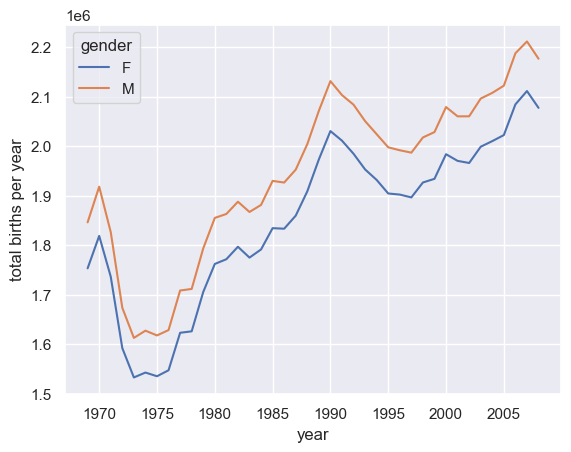

In [274]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() #use seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [278]:
# Further data exploration
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [280]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29.0,M,5944,1980
15063,1988,12,30.0,F,5742,1980
15064,1988,12,30.0,M,6095,1980
15065,1988,12,31.0,F,4435,1980


In [284]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)
births['day']

0         1
1         1
2         2
3         2
4         3
         ..
15062    29
15063    30
15064    30
15065    31
15066    31
Name: day, Length: 14610, dtype: int32

In [285]:
# create a datatime index from the year, month, day
births.index = pd.to_datetime (10000 * births.year +
                               100 * births.month +
                              births.day, format = '%Y%m%d')
births['dayofweek'] = births.index.dayofweek

TypeError: 'method' object is not subscriptable

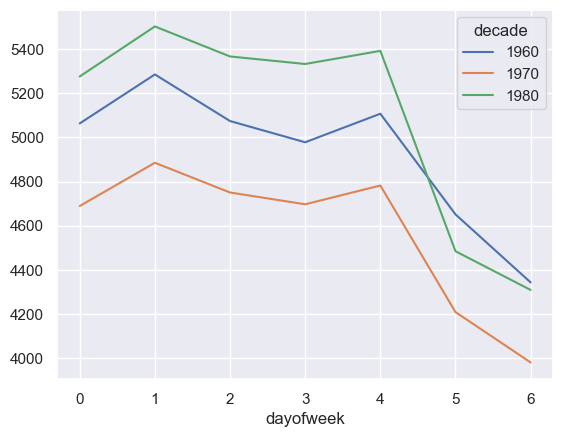

In [286]:
import matplotlib.pyplot as plt
import matplotlib as mpl
births.pivot_table('births', index='dayofweek', 
                   columns = 'decade', aggfunc='mean').plot()
plt.gca().set_xticklabels['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
plt.ylabel('mean births by day');

In [287]:
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [288]:
births_by_date.index = [pd.datetime(2012, month, day)
                       for (month, day) in births_by_date.index]
births_by_date.head()

C:\Users\yugal\AppData\Local\Temp\ipykernel_12784\3201186487.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day)


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


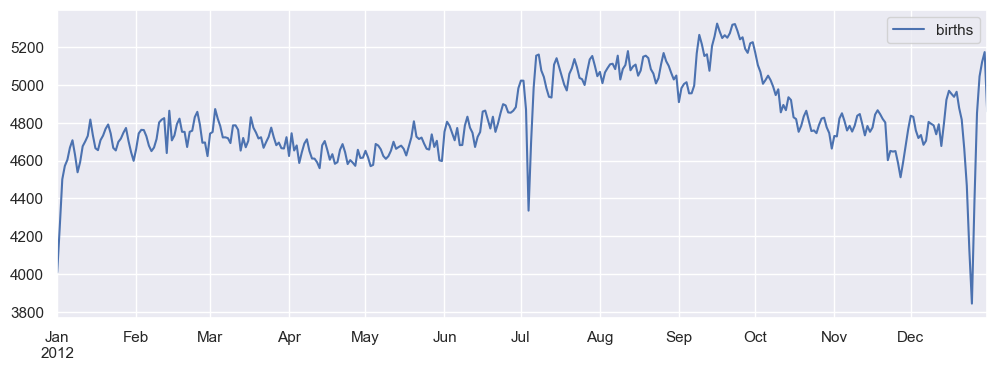

In [290]:
# Plot the results
fig, ax = plt.subplots(figsize = (12, 4))
births_by_date.plot(ax = ax);

### Vectorizing String Operations
#### Introducing Pandas String Operations

In [291]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [292]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize()  for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [295]:
#This is perhaps sufficient to work with some data, but it will break if there are any missing values. For example:
'''data = ['peter', 'Paul', None ,'MARY', 'gUIDO']
[s.capitalize()  for s in data]'''

"data = ['peter', 'Paul', None ,'MARY', 'gUIDO']\n[s.capitalize()  for s in data]"

In [296]:
import pandas as pd
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [297]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

### Tables of Pandas String Methods

In [301]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

#### Methods similar to Python string methods
Nearly all Python’s built-in string methods are mirrored by a Pandas vectorized string
method. Here is a list of Pandas str methods that mirror Python string methods:<br>
len() lower() translate() islower()<br>
ljust() upper() startswith() isupper()<br>
rjust() find() endswith() isnumeric()<br>
center() rfind() isalnum() isdecimal()<br>
zfill() index() isalpha() split()<br>
strip() rindex() isdigit() rsplit()<br>
rstrip() capitalize() isspace() partition()<br>
lstrip() swapcase() istitle() rpartition()<br>

In [300]:
# some, like lower(), return a series of strings:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [302]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [306]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [307]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

##### Methods using regular expressions

In [308]:
'''With these, you can do a wide range of interesting operations. For example, we can
extract the first name from each by asking for a contiguous group of characters at the
beginning of each element:'''
monte.str.extract('([A-Za-x]+)')

,0
0,Graham
1,John
2,Terr
3,Eric
4,Terr
5,Michael


In [309]:
'''Or we can do something more complicated, like finding all names that start and end
with a consonant, making use of the start-of-string (^) and end-of-string ($) regular
expression characters:'''
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

##### Miscellanous methods
##### Vectorized item access and slicing
The get() and slice() operations, in particular,
enable vectorized element access from each array. For example, we can get a slice of
the first three characters of each array using str.slice(0, 3). Note that this behav‐
ior is also available through Python’s normal indexing syntax—for example,
df.str.slice(0, 3) is equivalent to df.str[0:3]:

In [310]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

These get() and slice() methods also let you access elements of arrays returned by
split(). For example, to extract the last name of each entry, we can combine
split() and get():

In [311]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

##### Indicator variables
 Another method that requires a bit of extra explanation is the
get_dummies() method. This is useful when your data has a column containing some
sort of coded indicator. For example, we might have a dataset that contains informa‐
tion in the form of codes, such as A=“born in America,” B=“born in the United King‐
dom,” C=“likes cheese,” D=“likes spam”:

In [312]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C', 
                                   'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [313]:
# The get_dummies() routine lets you quickly split out these indicator variables into a DataFrame:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


### Example: Recipe Database

In [314]:
# The database is in JSON format, so we will try pd.read_json to read it:
try:
    recipes = pd.read_json("C:/Users/yugal/Downloads/recipeitems-latest.json")
except ValueError as e:
    print("ValueError:", e)

ValueError: Trailing data


In [315]:
with open('C:/Users/yugal/Downloads/recipeitems-latest.json') as f:
    line = f.readline()
pd.read_json(line).shape

(2, 12)

In [324]:
# read the entire file into a Python array
with open('C:/Users/yugal/Downloads/recipeitems-latest.json', 'r') as f:
    # Extract each line
    data = (line.strip() for line in f)
    # Reformat so each line is the element of a list
    data_json = "[{0}]".format(','.join(data))
# read the result as a JSON
recipes = pd.read_json(data_json)

In [327]:
recipes.shape

(2, 12)

In [329]:
# Let's take a look at one row to see what we have:
recipes.iloc[0]

_id                           {'$oid': '5160756b96cc62079cc2db15'}
name                               Drop Biscuits and Sausage Gravy
ingredients      Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
url              http://thepioneerwoman.com/cooking/2013/03/dro...
image            http://static.thepioneerwoman.com/cooking/file...
ts                                        {'$date': 1365276011104}
cookTime                                                     PT30M
source                                             thepioneerwoman
recipeYield                                                     12
datePublished                                           2013-03-11
prepTime                                                     PT10M
description      Late Saturday afternoon, after Marlboro Man ha...
Name: 0, dtype: object

In [330]:
recipes.ingredients.str.len().describe()

count      2.000000
mean     415.500000
std      142.128463
min      315.000000
25%      365.250000
50%      415.500000
75%      465.750000
max      516.000000
Name: ingredients, dtype: float64

In [332]:
# just out of curiosity, lets see which recipe has the longest ingredient list:
recipes.name[np.argmax(recipes.ingredients.str.len())]

'Hot Roast Beef Sandwiches'

In [333]:
# We can do other aggregate explorations; for example, lets see how many of the recipes are for breakfast food:
recipes.description.str.contains('[Bb]reakfast').sum()

0

In [335]:
# or how many of the recipes list cinnamon as an ingredient:
recipes.ingredients.str.contains('[Cc]innamon').sum()

0

In [336]:
# we could even look to see whether any recipes misspell the ingredients as 'cinamon':
recipes.ingredients.str.contains("[Cc]inamon").sum()

0

##### A simple recipe recommender

In [337]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley', 'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [338]:
# We can build a Boolean DataFrame consisting of True and False values, indicating whether this ingredient appears in the list:
import re
spice_df = pd.DataFrame(
           dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE))
                                                         for spice in spice_list))
spice_df.head()

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False


In [339]:
'''Now, as an example, let’s say we’d like to find a recipe that uses parsley, paprika, and tarragon. We can compute 
this very quickly using the query() method of DataFrames'''
selection = spice_df.query('parsley & paprika & tarragon')
len(selection)

0

In [340]:
recipes.name[selection.index]

Series([], Name: name, dtype: object)